# Soal 8

1. Dengan Auto.csv, buat regresi menggunakan `mpg` sebagai response dan `horsepower` sebagai prediktor
 1. [Apakah ada hubungan antara prediktor dan response](#1.-A)
 2. [Seberapa kuat hubungannya](#1.-B)
 3. [Apakah hubungannya positif atau negatif](#1.-C)
 4. [Berapa nilai `mpg` jika nilai `horsepower` 98? berapa confidence dan prediction intervalnya](#1.-D)
2. [Plot response dan predictor](#2)
3. [Analisis hasil plot tersebut](#3)

In [1]:
# import library yang dibutuhkan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm

%matplotlib inline

## Makan


In [2]:
auto = pd.read_csv('dataset/Auto.csv')

In [3]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
mpg             397 non-null float64
cylinders       397 non-null int64
displacement    397 non-null float64
horsepower      397 non-null object
weight          397 non-null int64
acceleration    397 non-null float64
year            397 non-null int64
origin          397 non-null int64
name            397 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


## 1. A 

In [5]:
x_train = auto['horsepower']
y_train = auto['mpg']

In [6]:
x_train.head()

0    130
1    165
2    150
3    150
4    140
Name: horsepower, dtype: object

In [7]:
y_train.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

Dari soal sebelumnya kita tahu bahwa Auto.csv mengandung '?' di dalamnya. Sehingga harus kita hilangkan.
<br>
Kita dapat menggunakan perintah ini juga sebenarnya jika kita sudah mengetahui bahwa ada '?' di data kita
```python
auto = pd.read_csv('Data/Auto.csv', na_values='?').dropna()
```

In [8]:
# cek apakah tidak ada hal aneh di data kita
x_train.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [9]:
y_train.unique()

array([18. , 15. , 16. , 17. , 14. , 24. , 22. , 21. , 27. , 26. , 25. ,
       10. , 11. ,  9. , 28. , 19. , 12. , 13. , 23. , 30. , 31. , 35. ,
       20. , 29. , 32. , 33. , 17.5, 15.5, 14.5, 22.5, 24.5, 18.5, 29.5,
       26.5, 16.5, 31.5, 36. , 25.5, 33.5, 20.5, 30.5, 21.5, 43.1, 36.1,
       32.8, 39.4, 19.9, 19.4, 20.2, 19.2, 25.1, 20.6, 20.8, 18.6, 18.1,
       17.7, 27.5, 27.2, 30.9, 21.1, 23.2, 23.8, 23.9, 20.3, 21.6, 16.2,
       19.8, 22.3, 17.6, 18.2, 16.9, 31.9, 34.1, 35.7, 27.4, 25.4, 34.2,
       34.5, 31.8, 37.3, 28.4, 28.8, 26.8, 41.5, 38.1, 32.1, 37.2, 26.4,
       24.3, 19.1, 34.3, 29.8, 31.3, 37. , 32.2, 46.6, 27.9, 40.8, 44.3,
       43.4, 36.4, 44.6, 40.9, 33.8, 32.7, 23.7, 23.6, 32.4, 26.6, 25.8,
       23.5, 39.1, 39. , 35.1, 32.3, 37.7, 34.7, 34.4, 29.9, 33.7, 32.9,
       31.6, 28.1, 30.7, 24.2, 22.4, 34. , 38. , 44. ])

y_train tidak mengandung '?', hanya x_train saja. Namun biar dimensinya sama, baris di y_train juga harus dihapus yang berasosiasi dengan '?' di baris x_train

In [10]:
count = 0
for item in x_train:
    if item == '?':
        count += 1
print('jumlah \'?\' ada ', count)

jumlah '?' ada  5


In [11]:
print('dimensi x_train = ', x_train.shape)
print('dimensi y_train = ', y_train.shape)

dimensi x_train =  (397,)
dimensi y_train =  (397,)


In [12]:
# hilangkan '?' di data kita
# ambil indexnya
drop = x_train[x_train == '?'].index
x_train = x_train.drop(drop)

In [13]:
# cek lagi apakah masih ada
x_train.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [14]:
print('dimensi x_train = ', x_train.shape)
print('dimensi y_train = ', y_train.shape)

dimensi x_train =  (392,)
dimensi y_train =  (397,)


In [15]:
# hapus biar dimensinya sama
y_train = y_train.drop(drop) 

In [16]:
print('dimensi x_train = ', x_train.shape)
print('dimensi y_train = ', y_train.shape)

dimensi x_train =  (392,)
dimensi y_train =  (392,)


In [17]:
x_train.head()

0    130
1    165
2    150
3    150
4    140
Name: horsepower, dtype: object

In [18]:
y_train.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

Karena x_train memiliki dtype: object, maka kita harus membuatnya menjadi float64 dengan cara mengcast data typenya

In [19]:
x_train = x_train.astype('float')

In [20]:
x_train.head()

0    130.0
1    165.0
2    150.0
3    150.0
4    140.0
Name: horsepower, dtype: float64

In [21]:
dir(smf)

['GEE',
 'GLM',
 'GLS',
 'GLSAR',
 'Logit',
 'MNLogit',
 'MixedLM',
 'NegativeBinomial',
 'NominalGEE',
 'OLS',
 'OrdinalGEE',
 'PHReg',
 'Poisson',
 'Probit',
 'QuantReg',
 'RLM',
 'WLS',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'gee',
 'glm',
 'gls',
 'glsar',
 'logit',
 'mixedlm',
 'mnlogit',
 'negativebinomial',
 'nominal_gee',
 'ols',
 'ordinal_gee',
 'phreg',
 'poisson',
 'probit',
 'quantreg',
 'rlm',
 'wls']

kita menggunakan statsmodel untuk menganalisa data. Seperti yang di jelaskan [di sini](https://www.statsmodels.org/stable/index.html), library statsmodel memberikan kita penjelasa deskriptif terhadap model. Statsmodel menerima input berupa dataframe sehingga kita harus menyatukan dua buah list/array menjadi dataframe.

In [22]:
data = {
    'horsepower': x_train,
    'mpg': y_train
       }
df_data = pd.DataFrame(data=data)

In [23]:
df_data.head()

,horsepower,mpg
0,130.0,18.0
1,165.0,15.0
2,150.0,18.0
3,150.0,16.0
4,140.0,17.0


In [24]:
df_data.shape

(392, 2)

Jika Anda menglami `AssertionError`, kemungkinan Anda belum mengupgrade library `patsy` Anda. Silahkan cek [di sini](https://github.com/statsmodels/statsmodels/issues/5343) lebih lengkapnya

In [25]:
model = smf.ols(formula='mpg ~ horsepower', data=df_data).fit()

In [26]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Thu, 31 Jan 2019   Prob (F-statistic):           7.03e-81
Time:                        08:42:06   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.0

Dilihat dari hasil di atas, dapat disimpulkan bahwa ada hubungan yang kuat antara horsepower dan mpg. Nilai F-Statisticnya lebih besar dari 1 menunjukkan hubungan yang kuat. Nilai $R^{2}$ nya lebih besar daro 0.5 menunjukkan hasil yang bagus dan hubungan yang kuat.
<br>
Selain itu, nilai p-value dari F-Statistic menunjukkan nilai yang mendekati nol sehingga kita bisa menolak null hypothesis (tidak ada hubungan yang kuat antara mpg dan horsepower)

## 1. B

Nilai $R^{2}$ ialah 0.606 atau 60.6% dari variansi mpg dijelaskan oleh horsepower.

In [27]:
model.rsquared

0.6059482578894348

## 1. C

Karena koefisien horsepower negatif (-0.1578) maka hubungan antara mpg dan horsepower negatif. Sehingga semakin besar nilai horsepower, maka akan semakin kecil nilai dari mpg

In [28]:
model.params

Intercept     39.935861
horsepower    -0.157845
dtype: float64

## 1. D

In [29]:
model.predict({'horsepower':98})

0    24.467077
dtype: float64

untuk perhitungan confidence intervalnya kita menggunakan fungsi di bawah ini

In [30]:
from scipy.stats import t
from math import sqrt

def interval(x, y, x0,alpha = .05):
    n = np.size(x)
    x_bar = np.mean(x)
    y_bar = np.mean(y)
    S_xx = np.sum((x-x_bar)**2)         
    S_xy = np.sum((x-x_bar)*(y-y_bar))  
    b = S_xy/S_xx                       
    a = y_bar - b*x_bar                 
    S2 = np.sum((y-a-b*x)**2)/(n-2)     
    S = sqrt(S2)
    ts = t.ppf(1-alpha/2, n-2)
    w_conf = ts*S*sqrt(1/n + (x0-x_bar)**2/S_xx)      
    w_pred = ts*S*sqrt(1 + 1/n + (x0-x_bar)**2/S_xx)  
    print("                fit \t lwr \t  upr")
    print("confidence %3.5f %3.5f %3.5f" % (a+b*x0, a+b*x0 - w_conf, a+b*x0 + w_conf))
    print("prediction %3.5f %3.5f %3.5f" % (a+b*x0, a+b*x0 - w_pred, a+b*x0 + w_pred))

x = df_data['horsepower']
y = df_data['mpg']
x0 = 98    

interval(x, y, x0)

                fit 	 lwr 	  upr
confidence 24.46708 23.97308 24.96108
prediction 24.46708 14.80940 34.12476


confidence interval -> kita yakin bahwa 95% best fit line populasi ada di range nilai confidence interval (mean valuenya akan jatuh sekitar nilai itu)
<br>
prediction interval -> 95% nilai Y dapat ditemukan di range prediction interval (nilai individual data yang baru akan jatuh di sekitar nilai itu)

A prediction from a machine learning perspective is a single point that hides the uncertainty of that prediction.

Prediction intervals provide a way to quantify and communicate the uncertainty in a prediction. They are different from confidence intervals that instead seek to quantify the uncertainty in a population parameter such as a mean or standard deviation. Prediction intervals describe the uncertainty for a single specific outcome.

Selengkapnya bisa di baca [di sini](https://machinelearningmastery.com/prediction-intervals-for-machine-learning/)

## 2

/home/uulwake/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


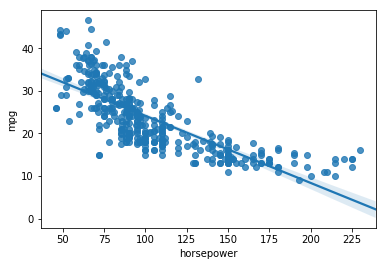

In [32]:
sns.regplot(x="horsepower", y="mpg", data=df_data)

## 3

dalam R, plot() akan menghasilkan grafik Residuals vs Fitted, Normal Q-Q, Scale-Location, dan Residuals vs Leverage. Di python, kita harus membuat keempat grafik ini secara manual

In [35]:
import statsmodels.formula.api as smf
from statsmodels.graphics.gofplots import ProbPlot

plt.style.use('seaborn') # pretty matplotlib plots
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)

model_f = 'mpg ~ horsepower'

df_data.reset_index(drop=True, inplace=True)

model = smf.ols(formula=model_f, data=df_data)

model_fit = model.fit()

# fitted values (need a constant term for intercept)
model_fitted_y = model_fit.fittedvalues

# model residuals
model_residuals = model_fit.resid

# normalized residuals
model_norm_residuals = model_fit.get_influence().resid_studentized_internal

# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# absolute residuals
model_abs_resid = np.abs(model_residuals)

# leverage, from statsmodels internals
model_leverage = model_fit.get_influence().hat_matrix_diag

# cook's distance, from statsmodels internals
model_cooks = model_fit.get_influence().cooks_distance[0]


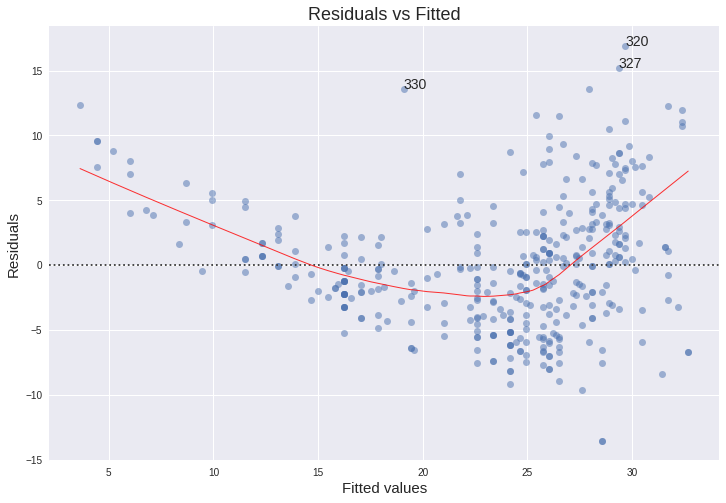

In [37]:
# residuals vs Fitted Values
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)

plot_lm_1.axes[0] = sns.residplot(model_fitted_y, 'mpg', data=df_data,
                                  lowess=True,
                                  scatter_kws={'alpha': 0.5},
                                  line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')


# annotations
abs_resid = model_abs_resid.sort_values(ascending=False)
abs_resid_top_3 = abs_resid[:3]

for i in abs_resid_top_3.index:
    plot_lm_1.axes[0].annotate(i, 
                               xy=(model_fitted_y[i], 
                                   model_residuals[i]));

Dari hasil di atas, diketahui bahwa garus merah membentuk suatu pola pada residual plot yang mengindikasikan sebuah pola. Jika residual plot menghasilkan suatu pola garis merah, maka ada yang salah dengan linearitas model (model seharusnya non-linear)

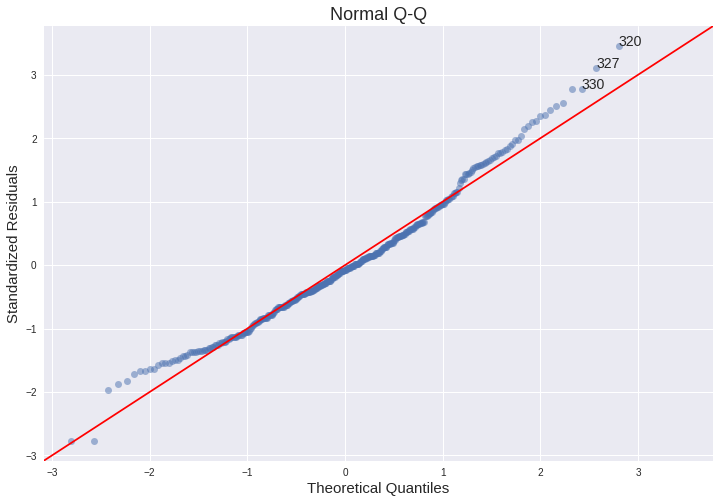

In [38]:
# normal Q-Q plot
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)

plot_lm_2.set_figheight(8)
plot_lm_2.set_figwidth(12)

plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');

# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]

for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i, 
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]));

Penjelasan mengenai Q-Q plot bisa di nonton di video ini [di sini](https://www.youtube.com/watch?v=okjYjClSjOg)

Secara garis besar, Q-Q (Quantile-Quantile) plot adalah membandingkan dua distribusi, apakah memiliki distribusi yang sama atau tidak

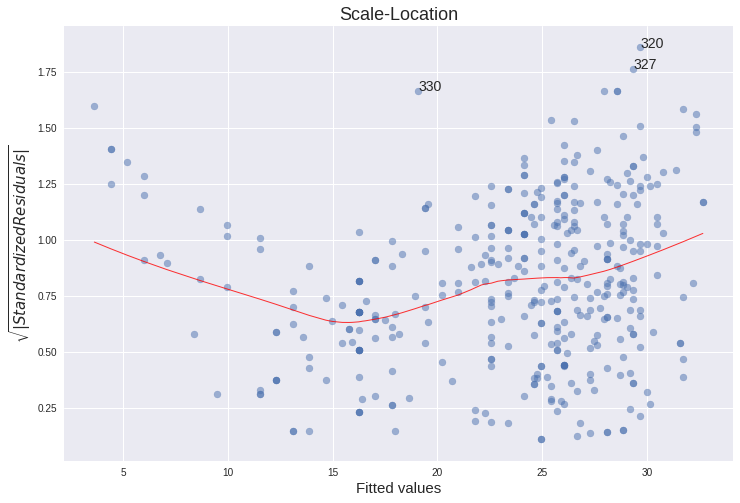

In [39]:
# Scale-Location plot
plot_lm_3 = plt.figure(3)
plot_lm_3.set_figheight(8)
plot_lm_3.set_figwidth(12)

plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5)
sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');


for i in abs_norm_resid_top_3:
    plot_lm_3.axes[0].annotate(i, 
                               xy=(model_fitted_y[i], 
                                   model_norm_residuals_abs_sqrt[i]));

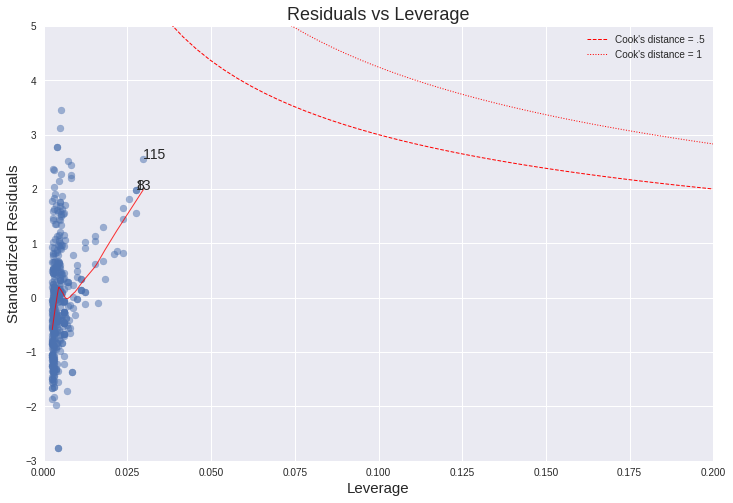

In [40]:
# Residuals vs Leverages
plot_lm_4 = plt.figure(4)
plot_lm_4.set_figheight(8)
plot_lm_4.set_figwidth(12)

plt.scatter(model_leverage, model_norm_residuals, alpha=0.5)
sns.regplot(model_leverage, model_norm_residuals, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_4.axes[0].set_xlim(0, 0.20)
plot_lm_4.axes[0].set_ylim(-3, 5)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals')

# annotations
leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]

for i in leverage_top_3:
    plot_lm_4.axes[0].annotate(i, 
                               xy=(model_leverage[i], 
                                   model_norm_residuals[i]))

# shenanigans for cook's distance contours
def graph(formula, x_range, label=None, ls='-'):
    x = x_range
    y = formula(x)
    plt.plot(x, y, label=label, lw=1, ls=ls, color='red')

p = len(model_fit.params) # number of model parameters

graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50), 
      'Cook\'s distance = .5', ls='--') # 0.5 line

graph(lambda x: np.sqrt((1 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50), 'Cook\'s distance = 1', ls=':') # 1 line

plt.legend(loc='upper right');